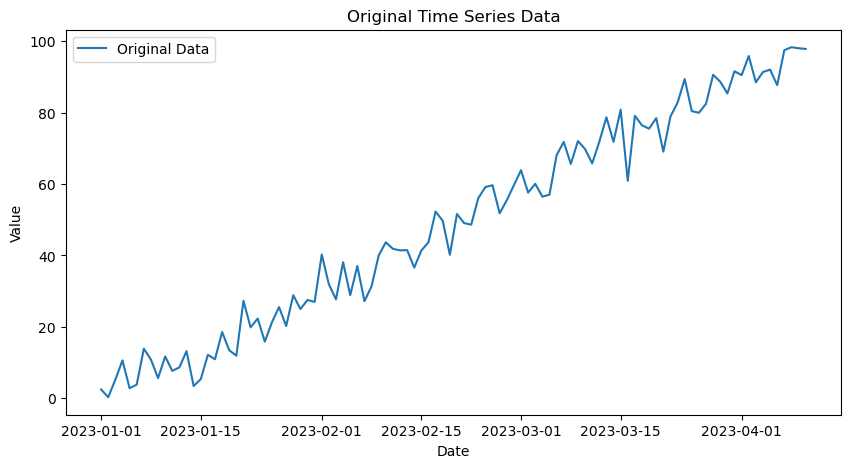

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(3)   Log Likelihood                -300.320
Method:               Conditional MLE   S.D. of innovations              5.350
Date:                Thu, 03 Oct 2024   AIC                            610.640
Time:                        16:46:23   BIC                            623.513
Sample:                    01-04-2023   HQIC                           615.845
                         - 04-10-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2329      1.086      2.056      0.040       0.104       4.362
y.L1           0.3428      0.095      3.590      0.000       0.156       0.530
y.L2           0.3117      0.096      3.236      0.0

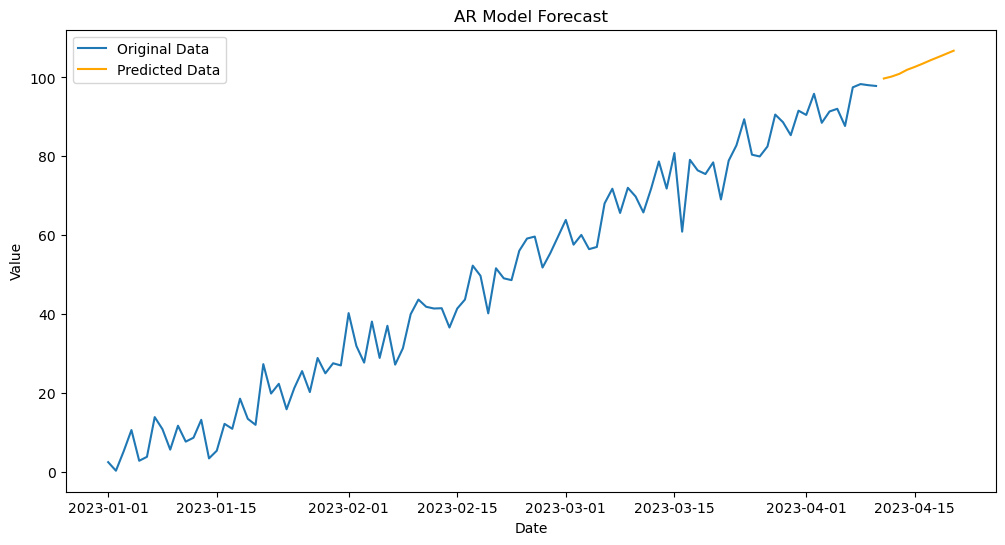

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Step 1: Create synthetic time series data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 5 + np.arange(100)  # Trend + random noise
data = pd.Series(values, index=dates)

# Step 2: Visualize the original data
plt.figure(figsize=(10, 5))
plt.plot(data, label='Original Data')
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Step 3: Fit AR model
# Choose the lag order (p) based on prior knowledge or ACF/PACF analysis
p = 3  # Example lag order
model = AutoReg(data, lags=p)
ar_model = model.fit()

# Step 4: Summary of the model
print(ar_model.summary())

# Step 5: Make predictions
n_periods = 10  # Number of periods to predict
predictions = ar_model.predict(start=len(data), end=len(data) + n_periods - 1)

# Step 6: Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D'), 
         predictions, label='Predicted Data', color='orange')
plt.title('AR Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


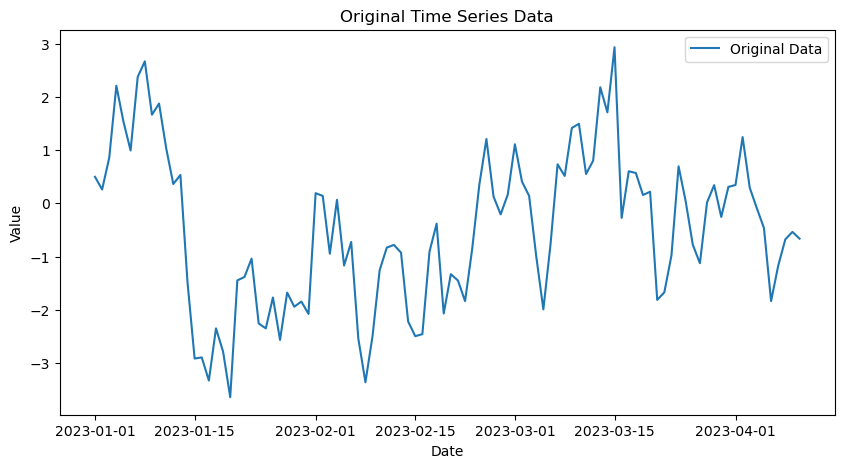

ADF Statistic: -3.4589633954510437
p-value: 0.00910570814399415

The time series is likely stationary.


C:\Users\omkar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\omkar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -130.967
Date:                Thu, 03 Oct 2024   AIC                            273.934
Time:                        16:47:59   BIC                            289.565
Sample:                    01-01-2023   HQIC                           280.260
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4634      0.427     -1.085      0.278      -1.301       0.374
ar.L1      -1.379e-06      0.261  -5.28e-06      1.000      -0.512       0.512
ar.L2          0.6441      0.198      3.246      0.0

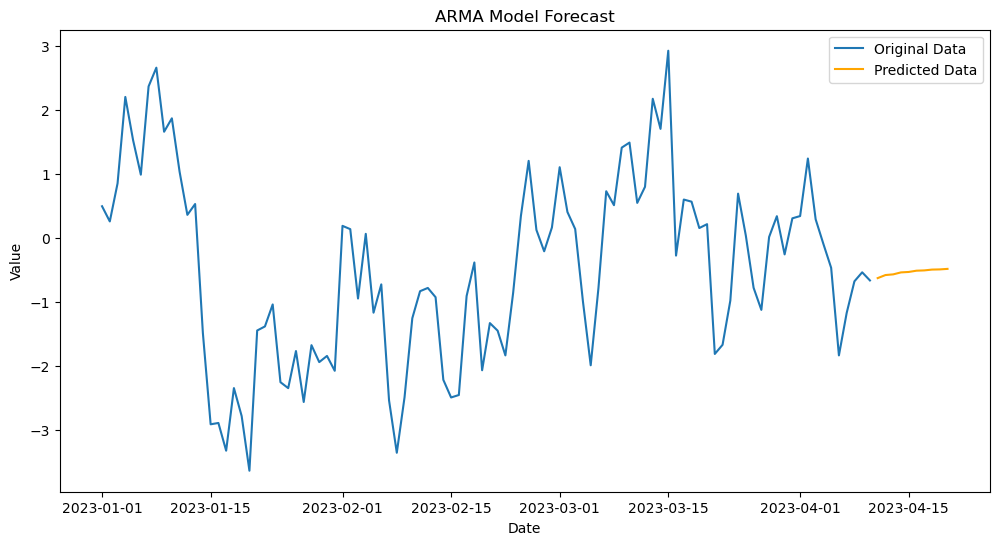

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Create synthetic time series data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
# Generate AR(1) process with some noise
phi = 0.8  # AR coefficient
values = [np.random.normal()]
for _ in range(1, 100):
    values.append(phi * values[-1] + np.random.normal())
data = pd.Series(values, index=dates)

# Step 2: Visualize the original data
plt.figure(figsize=(10, 5))
plt.plot(data, label='Original Data')
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Step 3: Check for stationarity using ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1]

# Check stationarity
adf_p_value = adf_test(data)
if adf_p_value > 0.05:
    print("\nThe time series is likely non-stationary (consider differencing).")
else:
    print("\nThe time series is likely stationary.")

# Step 4: Fit ARMA model
# Choose p and q based on prior knowledge or ACF/PACF analysis
p = 2  # Example AR lag order
q = 2  # Example MA lag order
model = ARIMA(data, order=(p, 0, q))  # d=0 for ARMA
arma_model = model.fit()

# Step 5: Summary of the model
print(arma_model.summary())

# Step 6: Make predictions
n_periods = 10  # Number of periods to predict
predictions = arma_model.forecast(steps=n_periods)

# Step 7: Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D'), 
         predictions, label='Predicted Data', color='orange')
plt.title('ARMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
